In [1]:
import pandas as pd
from pathlib import Path
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest, chi2, SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from skfeature.function.similarity_based import fisher_score


In [2]:
starter_df = pd.read_csv(Path("c://users/ajcth/documents/github/bank_churn_model/Resources/BankChurnersPrimary.csv"))
starter_df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
8164,717284133,Existing Customer,53,F,1,High School,Married,Less than $40K,Blue,41,...,3472.0,2517,955.0,0.750,4520,84,0.680,0.725,0.000175,0.99983
2684,709074108,Existing Customer,36,M,2,College,Single,$60K - $80K,Blue,24,...,23032.0,840,22192.0,0.739,2787,73,0.698,0.036,0.000549,0.99945
2889,718785483,Existing Customer,38,M,1,Doctorate,Single,$80K - $120K,Silver,29,...,34516.0,1435,33081.0,1.130,4238,85,0.809,0.042,0.000371,0.99963
2450,794818833,Existing Customer,36,F,1,Uneducated,Single,Less than $40K,Blue,30,...,5494.0,2078,3416.0,0.790,2661,58,0.871,0.378,0.000053,0.99995
9255,711578658,Existing Customer,56,F,2,High School,Married,$40K - $60K,Blue,49,...,6380.0,2517,3863.0,0.706,13945,97,1.064,0.395,0.000294,0.99971


In [3]:
starter_df.drop(columns=[
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'CLIENTNUM',
'Education_Level', 
'Marital_Status', 
'Income_Category'
], 
inplace= True)

In [4]:

enc = OneHotEncoder(sparse=False)
categorical_variables = ['Card_Category']
encoded_data = enc.fit_transform(starter_df[categorical_variables])
encoded_dataframe = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables))
starter_df.drop(columns=['Card_Category'], inplace=True)
starter_df = pd.concat([starter_df, encoded_dataframe.set_axis(starter_df.index)], axis=1)
starter_df.sample(10)

c:\python_files\Anaconda3\envs\dev\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2963,Existing Customer,48,M,3,35,3,3,3,21374.0,0,21374.0,0.631,4100,79,0.681,0.000,1.0,0.0,0.0,0.0
6959,Existing Customer,58,F,0,36,5,3,1,3008.0,2517,491.0,0.674,4627,68,0.659,0.837,1.0,0.0,0.0,0.0
7261,Existing Customer,37,F,2,19,6,5,2,2152.0,1682,470.0,1.051,4126,71,0.972,0.782,1.0,0.0,0.0,0.0
2006,Existing Customer,34,M,3,23,5,3,2,4245.0,1815,2430.0,0.846,1534,34,0.545,0.428,1.0,0.0,0.0,0.0
4224,Attrited Customer,57,F,3,51,3,0,3,1438.3,0,1438.3,0.429,2113,38,0.267,0.000,1.0,0.0,0.0,0.0
5452,Existing Customer,48,F,2,41,6,1,3,3632.0,1294,2338.0,0.924,4339,86,0.686,0.356,1.0,0.0,0.0,0.0
6188,Existing Customer,50,F,3,42,4,3,3,3743.0,881,2862.0,0.770,4621,71,0.821,0.235,1.0,0.0,0.0,0.0
5671,Attrited Customer,37,F,3,18,4,1,3,2179.0,0,2179.0,0.725,2568,48,0.297,0.000,1.0,0.0,0.0,0.0
1595,Existing Customer,55,M,3,49,3,2,4,9926.0,2018,7908.0,0.618,2235,57,0.357,0.203,1.0,0.0,0.0,0.0
9742,Existing Customer,39,F,2,34,1,3,3,3246.0,2517,729.0,0.722,13671,103,0.689,0.775,1.0,0.0,0.0,0.0


In [5]:
starter_df = starter_df.replace({'Gender' : {
'M': 0, 
'F': 1
}})
starter_df.Gender = starter_df.Gender.astype(int)

In [6]:
starter_df = starter_df.replace({'Attrition_Flag' : {
'Attrited Customer': 0, 
'Existing Customer': 1
}})
starter_df.Attrition_Flag = starter_df.Attrition_Flag.astype(int)

In [7]:
y = starter_df['Attrition_Flag']
X = starter_df.drop(columns=['Attrition_Flag'])

<AxesSubplot:>

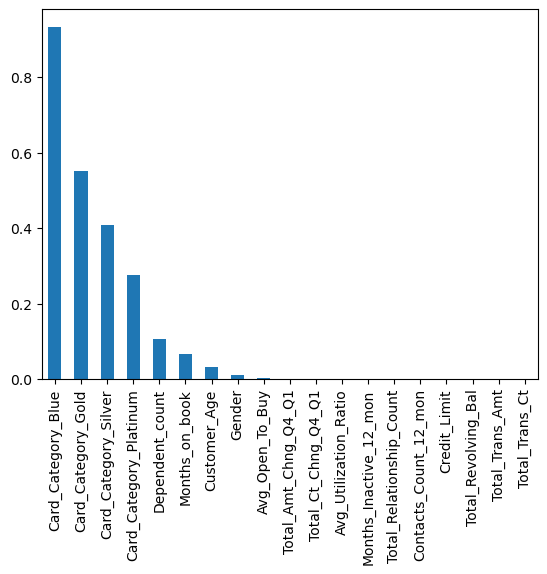

In [8]:
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()